# 03b - Model Evaluation

In [23]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'

In [24]:
f = open('outputs/specificity_results.pkl', 'rb')
specificity_results = pickle.load(f)
f.close()

spec_dgd_dam_counts = specificity_results['dgd_dam_counts']
spec_mwu_dam_counts = specificity_results['mwu_dam_counts']

In [25]:
f = open('outputs/sensitivity_results.pkl', 'rb')
sensitivity_results = pickle.load(f)
f.close()

sens_dgd_dam_counts = sensitivity_results['dgd_dam_counts']
sens_mwu_dam_counts = sensitivity_results['mwu_dam_counts']

In [26]:
f = open('outputs/dam_specificity_results.pkl', 'rb')
dam_specificity_results = pickle.load(f)
f.close()

In [27]:
f = open('outputs/dam_sensitivity_results.pkl', 'rb')
dam_sensitivity_results = pickle.load(f)
f.close()

In [28]:
f = open('outputs/dam_mtbls_specificity_results.pkl', 'rb')
dam_mtbls_specificity_results = pickle.load(f)
f.close()

In [29]:
f = open('outputs/cohorts_Normal.pkl', 'rb')
cohorts_normal = pickle.load(f)
f.close()

## Specificity - CAMP

In [30]:
mwu_rngn_results = [dam_specificity_results[c]['mwu_rngn_results'] for c in dam_specificity_results.keys()]
mwu_rnrn_results = [dam_specificity_results[c]['mwu_rnrn_results'] for c in dam_specificity_results.keys()]
num_metabolites = [len(cohorts_normal[c]['met_list']) for c in dam_specificity_results.keys()]

mwu_rngn_results_scaled = np.array(mwu_rngn_results) / np.array(num_metabolites)[:,None] * 100
mwu_rnrn_results_scaled = np.array(mwu_rnrn_results) / np.array(num_metabolites)[:,None] * 100

(4, 30)
(4, 1)


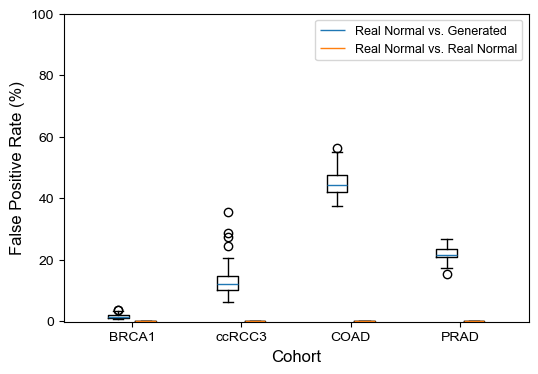

In [58]:
mwu_rngn_results = [dam_specificity_results[c]['mwu_rngn_results'] for c in dam_specificity_results.keys()]
mwu_rnrn_results = [dam_specificity_results[c]['mwu_rnrn_results'] for c in dam_specificity_results.keys()]
num_metabolites = [len(cohorts_normal[c]['met_list']) for c in dam_specificity_results.keys()]

print(np.array(mwu_rngn_results).shape)
print(np.array(num_metabolites)[:,None].shape)
mwu_rngn_results_scaled = np.array(mwu_rngn_results) / np.array(num_metabolites)[:,None] * 100
mwu_rnrn_results_scaled = np.array(mwu_rnrn_results) / np.array(num_metabolites)[:,None] * 100

cohorts = list(dam_specificity_results.keys())
cohorts[1] = 'ccRCC3'
vals1, vals2 = mwu_rngn_results_scaled, mwu_rnrn_results_scaled

fig, ax = plt.subplots(figsize=(6,4))
w, x = 0.25, np.arange(len(cohorts))

ax.boxplot(mwu_rngn_results_scaled.T, positions=x - w/2, widths=0.1875, medianprops=dict(color='C0'), label='Real Normal vs. Generated')
ax.boxplot(mwu_rnrn_results_scaled.T, positions=x + w/2, widths=0.1875, medianprops=dict(color='C1'), label='Real Normal vs. Real Normal')

ax.set_xticks(x)
ax.set_xticklabels(cohorts)
ax.set_ybound(-0.25, 100.0)
ax.set_xlabel("Cohort", fontsize=12)
ax.set_ylabel('False Positive Rate (%)', fontsize=12)
# # ax.set_title('False Positive DAMs (CAMP)')
ax.legend()
plt.legend(fontsize=9)
plt.savefig('figures/box_specificity_camp.png', bbox_inches='tight')

## Specificity - MTBLS

In [35]:
mwu_mtbls_rngn_results = [dam_mtbls_specificity_results[c]['mwu_rngn_results'] for c in dam_mtbls_specificity_results.keys()]
mwu_mtbls_rnrn_results = [dam_mtbls_specificity_results[c]['mwu_rnrn_results'] for c in dam_mtbls_specificity_results.keys()]
num_mtbls_metabolites = [len(cohorts_normal[c]['met_list']) for c in dam_mtbls_specificity_results.keys()]

mwu_mtbls_rngn_results_scaled = np.array(mwu_mtbls_rngn_results) / np.array(num_mtbls_metabolites)[:,None] * 100
mwu_mtbls_rnrn_results_scaled = np.array(mwu_mtbls_rnrn_results) / np.array(num_mtbls_metabolites)[:,None] * 100

In [36]:
np.mean(mwu_mtbls_rngn_results_scaled, axis=1)

array([12.2967265 ,  2.68330362,  0.40145985,  2.76422764])

In [37]:
np.array(num_mtbls_metabolites)[:,None]

array([[1894],
       [2805],
       [ 822],
       [ 123]])

In [38]:
np.array(num_mtbls_metabolites)[:,None] * np.mean(mwu_mtbls_rngn_results_scaled, axis=1)[:, None] / 100

array([[232.9       ],
       [ 75.26666667],
       [  3.3       ],
       [  3.4       ]])

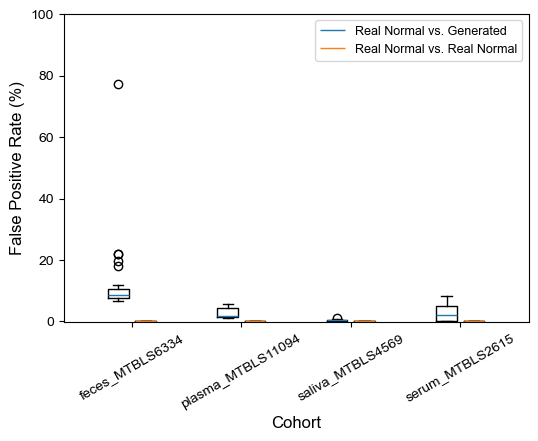

In [129]:
cohorts = list(dam_mtbls_specificity_results.keys())
vals1, vals2 = mwu_mtbls_rngn_results_scaled, mwu_mtbls_rnrn_results_scaled

fig, ax = plt.subplots(figsize=(6,4))
w, x = 0.25, np.arange(len(cohorts))

ax.boxplot(mwu_mtbls_rngn_results_scaled.T, positions=x - w/2, widths=0.1875, medianprops=dict(color='C0'), label='Real Normal vs. Generated')
ax.boxplot(mwu_mtbls_rnrn_results_scaled.T, positions=x + w/2, widths=0.1875, medianprops=dict(color='C1'), label='Real Normal vs. Real Normal')
ax.set_xticks(x)
ax.set_xticklabels(cohorts)
ax.set_ybound(-0.25, 100.0)
ax.set_xlabel("Cohort", fontsize=12)
ax.set_ylabel('False Positive Rate (%)', fontsize=12)
ax.tick_params(axis='x', labelrotation=30)
# # ax.set_title('False Positive DAMs (MTBLS)')
ax.legend()
plt.legend(fontsize=9)
plt.savefig('figures/box_specificity_mtbls.png', bbox_inches='tight')

## Sensitivity - CAMP

In [185]:
es_camp_rdgn_results    = np.array([dam_sensitivity_results[c]['mwu_rdgn_results'] for c in dam_sensitivity_results.keys()])
es_camp_rdrn_results    = np.array([dam_sensitivity_results[c]['mwu_rdrn_results'] for c in dam_sensitivity_results.keys()])
dam_camp_rdgn_results   = np.array([dam_sensitivity_results[c]['dacm_rdgn_results'] for c in dam_sensitivity_results.keys()])
dam_camp_rdrn_results   = np.array([dam_sensitivity_results[c]['dacm_rdrn_results'] for c in dam_sensitivity_results.keys()])
cm_count_results        = np.array([dam_sensitivity_results[c]['cm_count'] for c in dam_sensitivity_results.keys()])

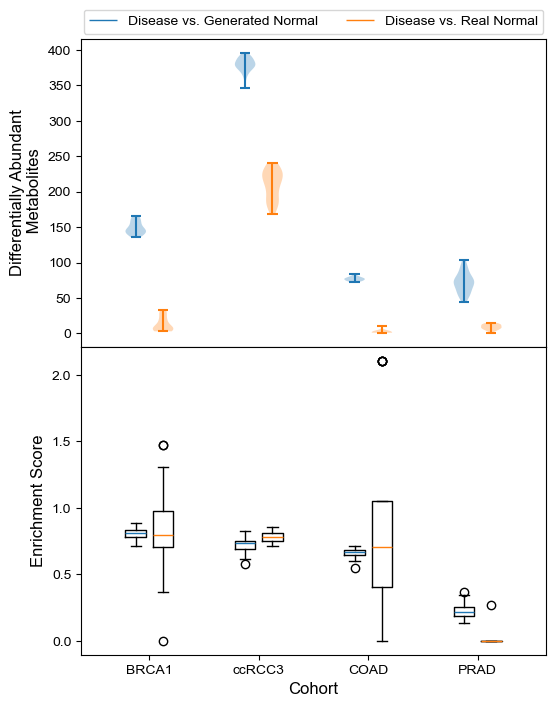

In [200]:
cohorts = list(dam_sensitivity_results.keys())
cohorts[1] = 'ccRCC3'
fig, ax = plt.subplots(nrows=2, figsize=(6,8), sharex='all')
fig.subplots_adjust(hspace=0)
w, x = 0.25, np.arange(len(cohorts))

ax[0].violinplot(dam_camp_rdgn_results.T, positions=x - w/2, widths=0.1875)
ax[0].violinplot(dam_camp_rdrn_results.T, positions=x + w/2, widths=0.1875)

ax[1].boxplot(es_camp_rdgn_results.T, positions=x - w/2, widths=0.1875, medianprops=dict(color='C0'), label='Disease vs. Generated Normal')
ax[1].boxplot(es_camp_rdrn_results.T, positions=x + w/2, widths=0.1875, medianprops=dict(color='C1'), label='Disease vs. Real Normal')

ax[0].set_xticks(x)
ax[0].set_xticklabels(cohorts)

ax[1].set_xticks(x)
ax[1].set_xticklabels(cohorts)
ax[1].set_xlabel("Cohort", fontsize=12)


ax[0].set_ylabel('Differentially Abundant\n Metabolites', fontsize=12)
ax[1].set_ylabel('Enrichment Score', fontsize=12)

# ax[1].tick_params(axis='x', labelrotation=30)

fig.legend(loc='upper center', bbox_to_anchor=(0.5125,0.925), ncol=2)
plt.savefig('figures/box_sensitivity_camp.png', bbox_inches='tight')

## CAMP FPR - VARYING P VALUES

In [188]:
f = open('outputs/dam_specificity_results_mtbls_thresholds_5.pkl', 'rb')
dam_specificity_results_mtbls_thresholds = pickle.load(f)
f.close()

11.430834213305173
1894
0.07130124777183611
2805
0.48661800486618007
822
3.6585365853658534
123


Text(0, 0.5, 'False Positive Rate (%)')

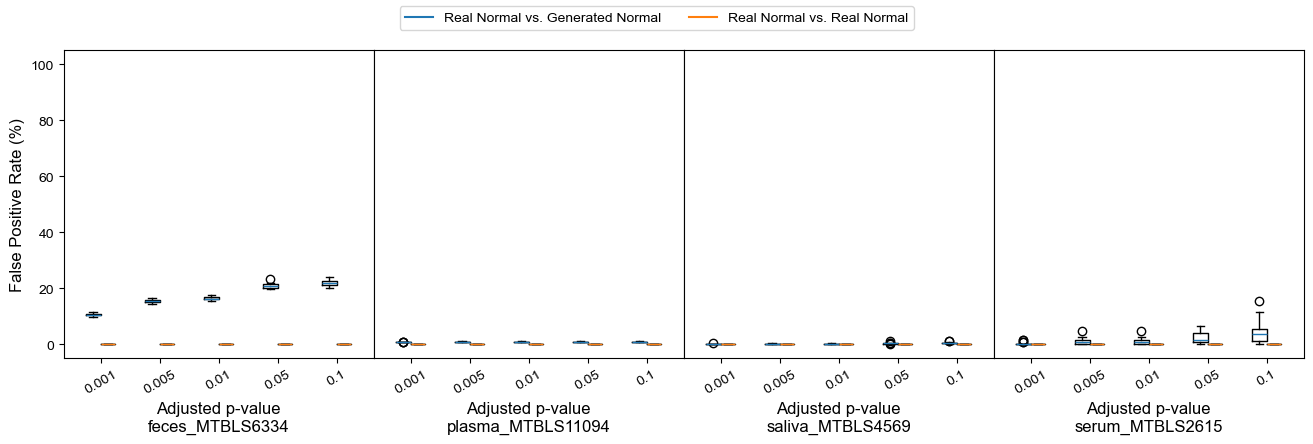

In [199]:
threshold = np.array([0.001, 0.005, 0.01, 0.05, 0.1])
threshold_str = [str(np.round(t,3)) for t in threshold]
# cohorts = list(dam_specificity_results.keys())
# cohorts[1] = 'ccRCC3'
i = 0
fig, ax = plt.subplots(ncols=4, figsize=(16,4))
fig.subplots_adjust(wspace=0)
fig.legend(handles=[
    plt.Line2D([],[], color='C0', linestyle='solid', label='Real Normal vs. Generated Normal'),
    plt.Line2D([],[], color='C1', linestyle='solid', label='Real Normal vs. Real Normal'),
], loc='upper center', ncol=2)

for c in dam_specificity_results_mtbls_thresholds.keys():
    mwu_rngn_results = [dam_specificity_results_mtbls_thresholds[c][t]['mwu_rngn_results'] for t in dam_specificity_results_mtbls_thresholds[c].keys()]
    mwu_rnrn_results = [dam_specificity_results_mtbls_thresholds[c][t]['mwu_rnrn_results'] for t in dam_specificity_results_mtbls_thresholds[c].keys()]
    num_metabolites = [len(cohorts_normal[c]['met_list']) for c in dam_specificity_results_mtbls_thresholds.keys()]


    mwu_rngn_results_scaled = np.array(mwu_rngn_results) / np.array(num_metabolites)[i] * 100
    mwu_rnrn_results_scaled = np.array(mwu_rnrn_results) / np.array(num_metabolites)[i] * 100
    print(np.max(np.median(mwu_rngn_results_scaled, axis=1)) - np.min(np.median(mwu_rngn_results_scaled, axis=1)))
    print(np.array(num_metabolites)[i])
    
    w, x = 0.25, np.arange(5)
    ax[i].boxplot(mwu_rngn_results_scaled.T, positions=x - w/2, widths=0.25, medianprops=dict(color='C0'), label='Real Normal vs. Generated')
    ax[i].boxplot(mwu_rnrn_results_scaled.T, positions=x + w/2, widths=0.25, medianprops=dict(color='C1'), label='Real Normal vs. Real Normal')

    ax[i].set_xticks(x)
    ax[i].set_xticklabels(threshold_str, rotation=30)
    ax[i].set_ybound(-5, 105)

    ax[i].set_xlabel(f"Adjusted p-value\n{c}", fontsize=12)
    # # ax.set_title('False Positive DAMs (CAMP)')

    if i > 0:
        ax[i].get_yaxis().set_ticks([])
    # ax[i].legend(fontsize=9)

    i += 1

ax[0].set_ylabel('False Positive Rate (%)', fontsize=12)
# plt.savefig('figures/box_specificity_mtbls_adjusted_pvalues_5.png', bbox_inches='tight')

???

Plot 4C (Enrichment Score comparison between DGD and MWU from different cancer types?)

In [12]:
# threshold = np.arange(0.01, 0.11, 0.01)
# fig, ax = plt.subplots(figsize=(6,3))


# # ax.boxplot(dgd_dam_counts, label='DGD')
# ax.plot(np.arange(1,10+1), np.array(sens_dgd_dam_counts),  marker='o', label='RD-GN')
# ax.plot(np.arange(1,10+1), np.array(sens_mwu_dam_counts),  marker='o', label='RD-RN')

# ax.set_xticklabels(np.round(threshold, 2))
# ax.set_xticks(np.arange(1,10+1), np.round(threshold, 2))
# ax.set_xlabel("Adjusted p-value")
# ax.set_ylabel("DAMs")

# ax.legend(bbox_to_anchor=(1.4, 1.025),
#                loc='upper right',
#                framealpha=1.0,
#                title='Method',
#                alignment='left')
# plt.show()

Plot 4B (Number of DAMs in varying intervals)

In [13]:
# threshold = np.arange(0.01, 0.11, 0.01)
# fig, ax = plt.subplots(figsize=(6,3))


# # ax.boxplot(dgd_dam_counts, label='DGD')
# ax.plot(np.arange(1,10+1), np.array(spec_dgd_dam_counts),  marker='o', label='RN-GN')
# ax.plot(np.arange(1,10+1), np.array(spec_mwu_dam_counts),  marker='o', label='RN-RN')

# ax.set_xticklabels(np.round(threshold, 2))
# ax.set_xticks(np.arange(1,10+1), np.round(threshold, 2))
# ax.set_xlabel("Adjusted p-value")
# ax.set_ylabel("False Positive DAMs")

# ax.legend(bbox_to_anchor=(1.4, 1.025),
#                loc='upper right',
#                framealpha=1.0,
#                title='Method',
#                alignment='left')
# plt.show()